<a href="https://colab.research.google.com/github/kianakiaei/TensorFlow/blob/main/neural_network_classification_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
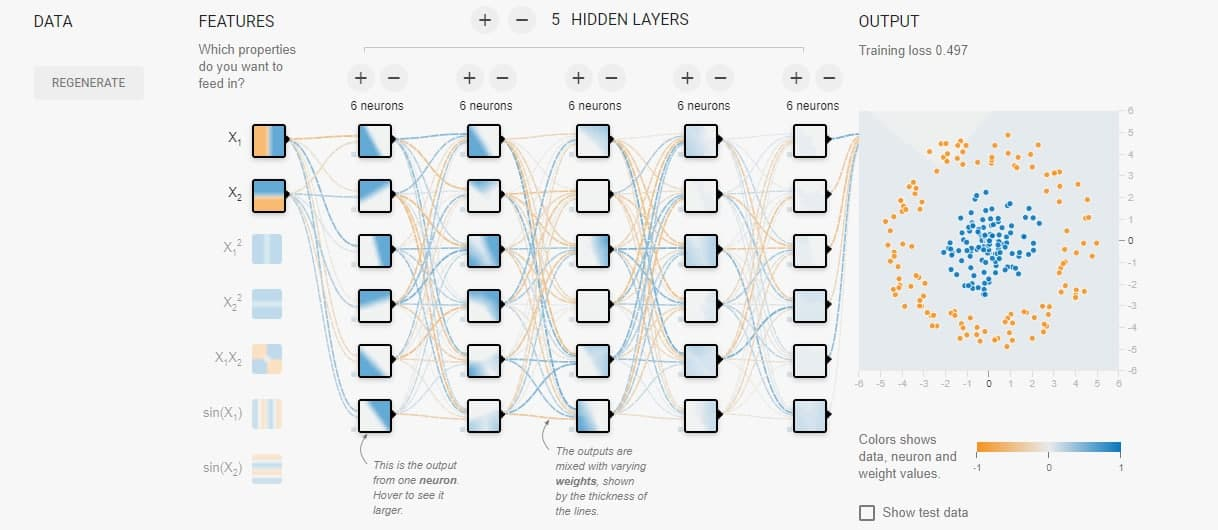

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                    noise=0.03, 
                    random_state=42)

In [3]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(6),
                               tf.keras.layers.Dense(6),
                               tf.keras.layers.Dense(6),
                               tf.keras.layers.Dense(6),
                               tf.keras.layers.Dense(6),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(x, y, epochs=100, verbose=0)

In [4]:
model_1.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933168172836304, 0.5]

## Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [5]:
from sklearn.datasets import make_moons

# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_moons(n_samples,
                    noise=0.03, 
                    random_state=42)

In [6]:
x.shape

(1000, 2)

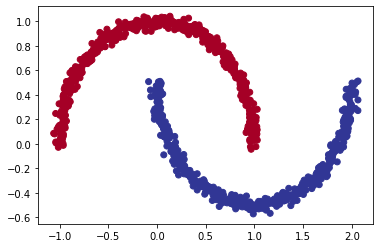

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [8]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, activation="relu"),
                               tf.keras.layers.Dense(10, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [9]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000


[0.005651082377880812, 1.0]

## Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [10]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [11]:
# normalize x
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

# Check the min and max values of the training data
x_train_norm.min(), x_train_norm.max()

(0.0, 1.0)

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_3 = model_3.fit(x_train_norm,
                          y_train,
                          epochs=20, # model already doing pretty good with current LR, probably don't need 100 epochs
                          callbacks=[lr_scheduler], 
                          verbose=0)

In [13]:
model_3.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4515 - accuracy: 0.8535


[0.45152562856674194, 0.8535000085830688]

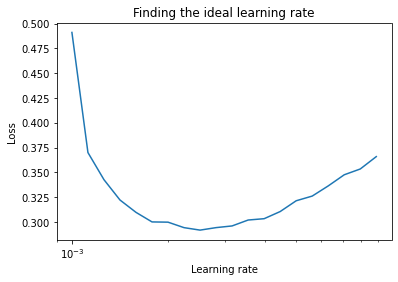

In [14]:
# Plot the learning rate decay curve

lrs = 1e-3 * (10**(np.arange(20)/20))
plt.semilogx(lrs, history_3.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                 metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(x_train_norm,
                        y_train,
                        epochs=20, # model already doing pretty good with current LR, probably don't need 100 epochs
                        verbose=0)

In [16]:
model_4.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4229 - accuracy: 0.8794


[0.4229317009449005, 0.8794000148773193]

In [17]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Make predictions with the most recent model
y_probs = model_4.predict(x_test_norm) 

# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

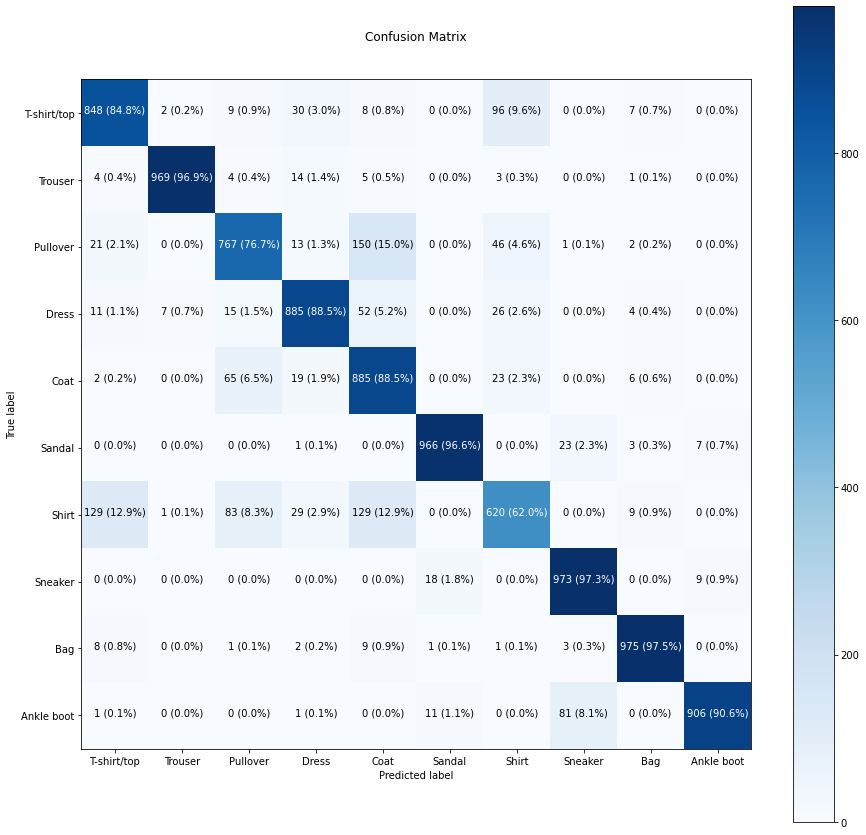

In [19]:
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds, 
                      classes=class_names, 
                      figsize=(15, 15),
                      text_size=10)

## Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [20]:
# ?

## Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

In [21]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes, figsize):
  """Picks a random image, plots it and labels it with a predicted and truth label.
  """ 

  for j in range(3):
    # Setup random integer
    i = random.randint(0, len(images))
  
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    plt.figure(figsize=figsize)
    plt.subplot(1, 3, j+1,)
    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # set the color to green or red

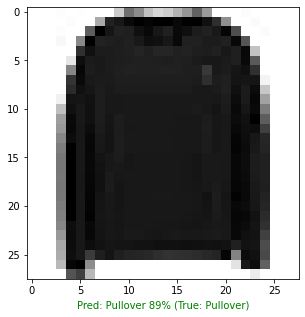

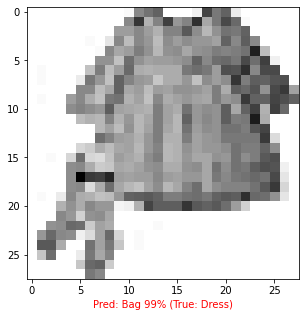

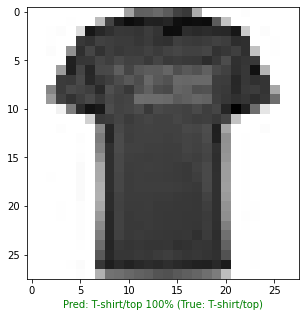

In [22]:
# Check out a random image as well as its prediction
plot_random_image(model=model_4, 
                  images=x_test_norm, 
                  true_labels=y_test, 
                  classes=class_names, 
                  figsize=(25, 5))

> wrong! why dont show in row?

## Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [56]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_class(model, images, true_labels, classes, figsize):

  # Setup random integer
  i = random.randint(0, len(classes))
  result = np.where(true_labels == i)
  result = np.squeeze(np. asarray(result))
  for j in range(3):
    
    ii = np.squeeze(np.random.choice(result, 1))
  
    # Create predictions and targets
    target_image = images[ii]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[ii]]

    plt.figure(figsize=figsize)
    plt.subplot(1, 3, j+1,)
    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # set the color to green or red

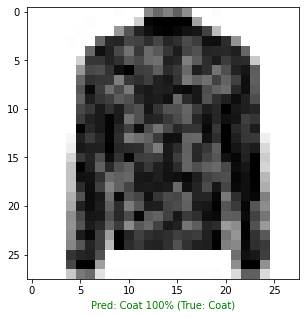

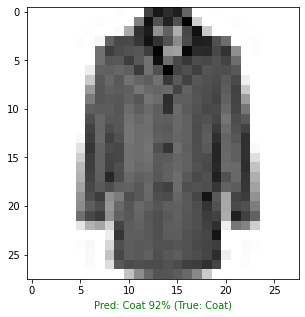

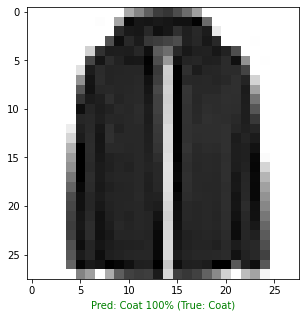

In [60]:
# Check out a random image as well as its prediction
plot_random_class(model=model_4, 
                  images=x_test_norm, 
                  true_labels=y_test, 
                  classes=class_names, 
                  figsize=(25, 5))

In [55]:
i = random.randint(0, len(class_names))
result = np.where(y_test == i)
result = np.squeeze(np. asarray(result))
ii = np.squeeze(np.random.choice(result, 1))
ii

array(400)